<a href="https://colab.research.google.com/github/alisterpage/CHEM3580-Jupyter-Notebooks/blob/main/h2_phasespace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipympl -q 2>&1 >/dev/null

# Phase Space - Vibration of H$_{2}$

Let's look again at the vibrational motion in the H$_{2}$ molecule. 

We have seen already that, provided the nuclei do not deviate too far from their equilibrium position, the potential energy surface for this molecule can be approximated as a simple harmonic potential, i.e. $U_{\text{stretch}} = k(\Delta R)^{2}$. 

Use the slider bar below to see how the energy of the molecule changes with the H-H bond length. 

interactive(children=(FloatSlider(value=0.751, description='r', max=1.251, min=0.251, step=0.01), Output()), _…

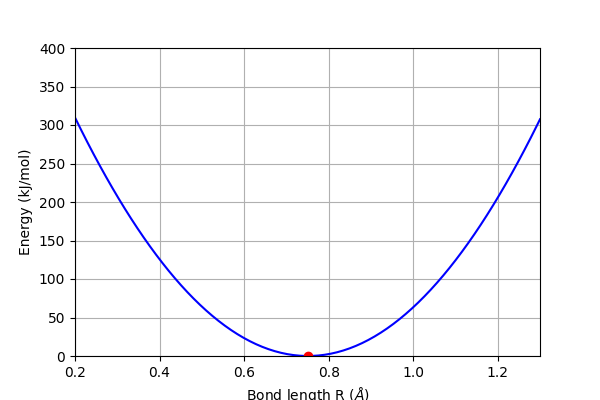

In [14]:
#@title
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from google.colab import output
output.enable_custom_widget_manager()

# set up plot
fig, ax = plt.subplots(figsize=(6, 4), gridspec_kw={'wspace': 0.4})
ax.set_ylim([0, 400])
ax.set_xlim([0.2,1.3])
ax.set_ylabel("Energy (kJ/mol)")
ax.set_xlabel("Bond length R ($\AA$)")
ax.grid(True)
#ax[1].set_xlabel("Bond length R ($\AA$)")
#ax[1].set_ylabel("Momentum (amu m/s)")
#ax[1].set_xlim([0.251,1.251])
#ax[1].set_ylim([-20.0,+20.0])
#ax[1].grid(True)
 
#declare globals
xarray = np.linspace(0.2, 1.3, 150)
xmin=0.751
k = 1020.0
A = 0.5
w = 10.0
m = 1.08*1.08/(1.08+1.08)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(A,w,r):
    return A*np.cos(w*r)

def harmonic_momentum(A,w,r,m):
    return -m*A*w*np.sin(w*r)

@widgets.interact(r=(0.251, 1.251, 0.01),continuous_update=False)
def update(r = 0.751):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(xarray, harmonic_curve(k,xarray,xmin),color='blue')
    ax.plot(r,harmonic_energy(k,r,xmin),marker="o",color='red')
    #ax[1].plot(xmin-harmonic_position(A,w,r),harmonic_momentum(A,w,r,m),marker="o",color='red')
    #ax[1].plot(xmin-harmonic_position(A,w,xarray),harmonic_momentum(A,w,xarray,m),color='blue')
   




Alternatively, we can look at how the energy of the molecule changes as a function of the momentum of the nuclei using the **phase space representation** of the molecule. 

Move the slider bar below to show the relationship between the H-H bond length, and the energy and momentum of the molecule.

interactive(children=(FloatSlider(value=0.751, description='r', max=1.251, min=0.251, step=0.01), Output()), _…

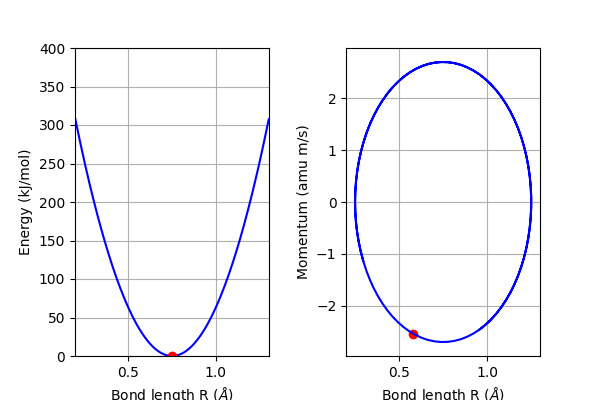

In [15]:
#@title
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from google.colab import output
output.enable_custom_widget_manager()

# set up plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
ax[0].set_ylim([0, 400])
ax[0].set_xlim([0.2,1.3])
ax[0].set_ylabel("Energy (kJ/mol)")
ax[0].set_xlabel("Bond length R ($\AA$)")
ax[0].grid(True)
ax[1].set_xlabel("Bond length R ($\AA$)")
ax[1].set_ylabel("Momentum (amu m/s)")
#ax[1].set_xlim([0.251,1.251])
#ax[1].set_ylim([-20.0,+20.0])
ax[1].grid(True)
 
#declare globals
xarray = np.linspace(0.2, 1.3, 150)
xmin=0.751
k = 1020.0
A = 0.5
w = 10.0
m = 1.08*1.08/(1.08+1.08)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(A,w,r):
    return A*np.cos(w*r)

def harmonic_momentum(A,w,r,m):
    return -m*A*w*np.sin(w*r)

@widgets.interact(r=(0.251, 1.251, 0.01),continuous_update=False)
def update(r = 0.751):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax[0].lines]
    ax[0].plot(xarray, harmonic_curve(k,xarray,xmin),color='blue')
    ax[0].plot(r,harmonic_energy(k,r,xmin),marker="o",color='red')
    ax[1].plot(xmin-harmonic_position(A,w,r),harmonic_momentum(A,w,r,m),marker="o",color='red')
    ax[1].plot(xmin-harmonic_position(A,w,xarray),harmonic_momentum(A,w,xarray,m),color='blue')
   




Remember though - the vibration of the molecule is constantly occuring in **time**, as determined by the **frequency** of the vibration.

Use the slider bars below to show how the bond length and the momentum is changing as a function of time and the vibration frequency. 

interactive(children=(FloatSlider(value=0.1, description='timestep', max=5.0, min=0.1), Output()), _dom_classe…

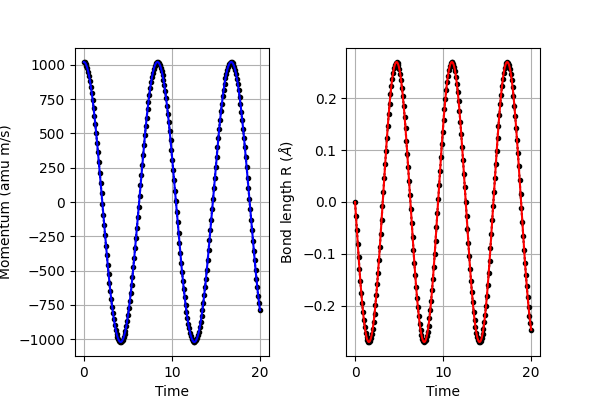

In [9]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from google.colab import output
output.enable_custom_widget_manager()

# set up plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
#ax[0].set_ylim([0, 400])
#ax[0].set_xlim([0.2,1.3])
ax[0].set_ylabel("Momentum (amu m/s)")
ax[0].set_xlabel("Time")
ax[0].grid(True)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Bond length R ($\AA$)")
#ax[1].set_xlim([0.251,1.251])
#ax[1].set_ylim([-20.0,+20.0])
ax[1].grid(True)

 
#declare globals
tstart=0.0
tend=20.0
tarray = np.linspace(tstart,tend, 2000)
rmin=0.751
#k = 1020.0
A = 0.5
w = 1.0
m = 1.08*1.08/(1.08+1.08)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(A,w,r):
    return A*np.cos(w*r)

def harmonic_momentum(A,w,r,m):
    return -m*A*w*np.sin(w*r)

@widgets.interact(timestep=(0.1, 5, 0.1),k=(0, 1500, 1),continuous_update=False)
def update(timestep = 0.1):
    approx_tarray = np.linspace(tstart,tend, int((tend-tstart)/timestep))
    [l.remove() for l in ax[0].lines]
    [l.remove() for l in ax[1].lines]      
    ax[0].plot(approx_tarray, harmonic_position(k,approx_tarray,rmin),color='black',linestyle='dotted',marker='.')
    ax[1].plot(approx_tarray,harmonic_momentum(A,w,approx_tarray,m),color='black',linestyle='dotted',marker='.')
    ax[0].plot(tarray, harmonic_position(k,tarray,rmin),color='blue')
    ax[1].plot(tarray,harmonic_momentum(A,w,tarray,m),color='red')
 
   


